# NYC Real Estate Price Prediction

## Objective

We will predict the real estate price to help the people buy and sell at a reasonable price.



## Business problems we will solve:

Lack of appropriate price information of real estate in NYC for individual seller and
buyer.

What type of building a real estate developer should build for the most add-value.


**The Use Scenario:**

When one wants to sell the real estate, they can use the model we create and add some variables (location, year, area, etc) to get the appropriate prediction price.

**Data mining and modeling**

Price is a target variable, and we will use supervised machine learning with cross-validation to find out influential variables.


**Source of data**
NYC government official data.

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page


# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
def load_data():
    df_mh=pd.read_excel("rollingsales_manhattan.xls",skiprows=4)
    df_mh["AREA"]="MH"
    df_bx=pd.read_excel("rollingsales_bronx.xls",skiprows=4)
    df_bx["AREA"]="BX"
    df=pd.concat([df_mh,df_bx])
    df.columns = df.columns.str.replace(' ', '_')
    df=df.drop(columns=['EASE-MENT'])# all the values in this column is nan.
    df['not_apartment']=df['APARTMENT_NUMBER'].isna()# ture: it is not an apartment. false: it is an apartment.
    df=df.drop(columns=['APARTMENT_NUMBER','ADDRESS','BUILDING_CLASS_AT_PRESENT'])
    
    df=df.dropna()
    return df

Here is how our data looks like:

In [3]:
df=load_data()
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,AREA,not_apartment
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809,2018-05-22,MH,True
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2018-05-23,MH,True
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000,2018-12-03,MH,True
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,10009.0,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0,2018-04-25,MH,True
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2018-11-29,MH,True


Our target variable is SALE_PRICE.
So, let's take a look of the distribution.

In [5]:
df["SALE_PRICE"].describe()

count    2.443900e+04
mean     2.406437e+06
std      2.344970e+07
min      0.000000e+00
25%      1.000000e+01
50%      5.800000e+05
75%      1.340045e+06
max      2.397502e+09
Name: SALE_PRICE, dtype: float64

In [12]:
df["SALE_PRICE"] = df["SALE_PRICE"].replace(0, np.NaN)
df["SALE_PRICE"].describe()

count    1.850900e+04
mean     3.177423e+06
std      2.690026e+07
min      1.000000e+00
25%      4.750000e+05
50%      7.980000e+05
75%      1.790000e+06
max      2.397502e+09
Name: SALE_PRICE, dtype: float64

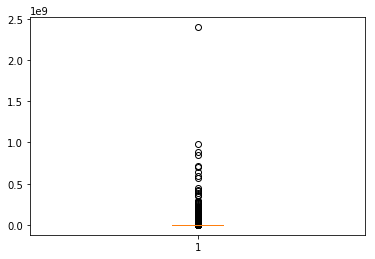

In [20]:
fig, ax = plt.subplots()
ax.boxplot(df[df["SALE_PRICE"]>0]["SALE_PRICE"]);

We find the range of the 'SALE_PRICE' varies a lot.
To wipe out unregular observation, We limit the price range from USD 100,000 to 100,000,000. 
which means, we exculde following percentage of data.

In [40]:
sum((df["SALE_PRICE"]<100000) | (df["SALE_PRICE"]>100000000))/len(df["SALE_PRICE"])

0.030197634927779368

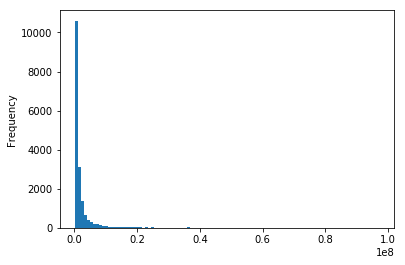

In [41]:
df[(df["SALE_PRICE"]>100000) & (df["SALE_PRICE"]<100000000)
  ]["SALE_PRICE"].plot.hist(bins=100);

Still, the range varies a lot. So we will take a log10.

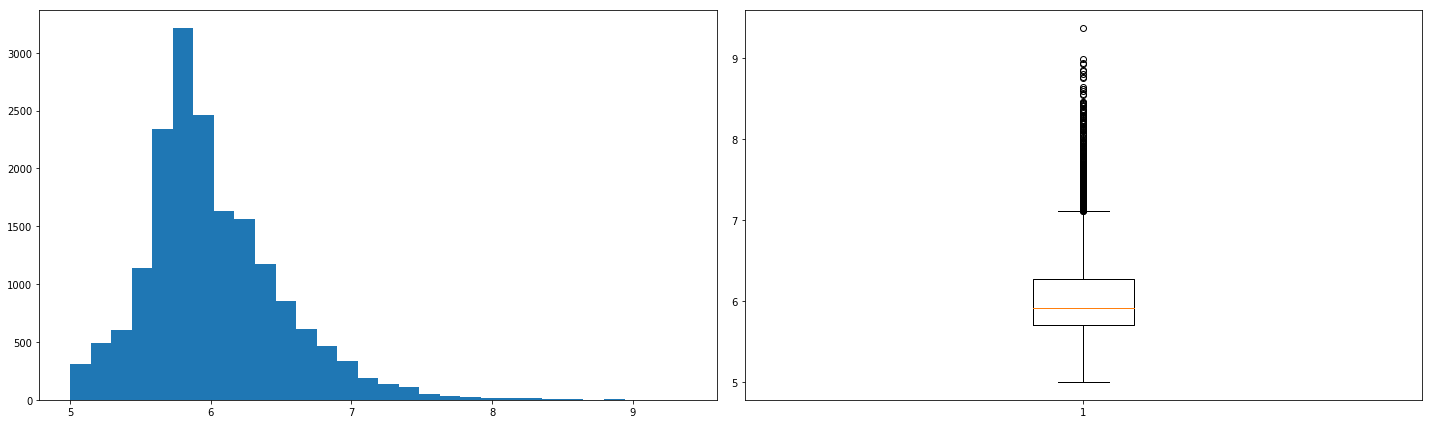

In [50]:
df["SALE_PRICE"] = df["SALE_PRICE"].replace(0, np.NaN)
df["Logged_SALE_PRICE"] = df["SALE_PRICE"].apply(np.log10)


rows = 1
cols = 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(10*cols, 6*rows))
axs = axs.flatten()
axs[0].hist(df[(df["Logged_SALE_PRICE"]>5)]["Logged_SALE_PRICE"], bins=30);
axs[1].boxplot(df[(df["Logged_SALE_PRICE"]>5)]["Logged_SALE_PRICE"]);
plt.tight_layout()   
